# Regressão Linear com NumPy

## Objetivos deste experimento

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente NumPy com:
- o **cálculo do gradiente**,
- a **função de perda** e
- a atualização dos parâmetros são feitos de forma explícita.
- A rede é criada com uma camada como uma classe

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting

from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

## Dataset

### Leitura dos dados

In [20]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1]
y_train = data[:,1:2]

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [21]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

Text(0, 0.5, 'Comprimento petalas')

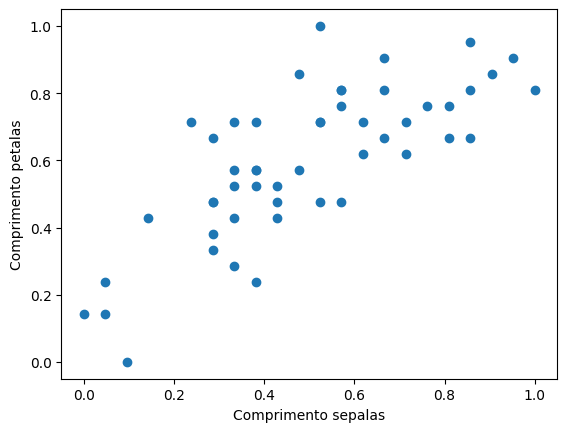

In [22]:
plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

## Modelo da rede

### Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/linhareta.png)

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde
* $w_1$ é o coeficiente angular da reta e
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

### Linear Regression Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

### Formulação matricial do neurônio

* $\mathbf{w} = [w_0 \ w_1]$ é vetor linha de parâmetros e
* $\mathbf{x} = [1 \ x_0] $ é vetor linha de uma amostra (com *bias*).

$$ \hat{y} = 1 w_0 + x_0 w_1 $$

$$ [\hat{y}] = [1 \ x_0] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ \mathbf{\hat{y}} = \mathbf{x} \mathbf{w^T} $$

### Fazendo o predict de várias amostras

$$ \begin{matrix}
\begin{bmatrix}
\hat{y}_0\\
\hat{y}_1\\
\\
\hat{y}_{M-1}
\end{bmatrix} &=& \begin{bmatrix}
1 & x_0 \\
1 & x_1\\
\\
1 & x_{M-1} \\
\end{bmatrix}
&
\begin{bmatrix}
w_0\\
w_1
\end{bmatrix} \\
(M,1) & & (M,2) & (2,1) \\
\end{matrix} $$

### Preenchendo x com coluna de 1's para bias

In [23]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [24]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428571],
       [1.        , 0.95238095],
       [1.        , 0.28571429],
       [1.        , 0.76190476],
       [1.        , 0.38095238],
       [1.        , 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.80952381],
       [1.        , 0.14285714],
       [1.        , 0.04761905],
       [1.        , 0.47619048],
       [1.        , 0.52380952],
       [1.        , 0.57142857],
       [1.        , 0.33333333],
       [1.        , 0.85714286],
       [1.        , 0.33333333],
       [1.        , 0.42857143],
       [1.        , 0.61904762],
       [1.        , 0.33333333],
       [1.        , 0.47619048],
       [1.        , 0.57142857],
       [1.        , 0.66666667],
       [1.        , 0.57142857],
       [1.        , 0.71428571],
       [1.        , 0.80952381],
       [1.        , 0.9047619 ],
       [1.        , 0.85714286],
       [1.        , 0.52380952],
       [1.        , 0.38095238],
       [1.

### Classe com o modelo da rede

In [25]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros

    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

### Criando a rede, instanciando o objeto model

In [63]:
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred

In [46]:
model.w

array([[0.05456532, 0.07652824]])

In [47]:
# Fazendo o foward para saber que a definição da minha rede esta certa
model.forward(x_train_bias)

array([[0.13109356],
       [0.10922835],
       [0.12744936],
       [0.07643054],
       [0.11287255],
       [0.08371894],
       [0.10558415],
       [0.05456532],
       [0.11651676],
       [0.06549793],
       [0.05820953],
       [0.09100734],
       [0.09465154],
       [0.09829575],
       [0.08007474],
       [0.12016096],
       [0.08007474],
       [0.08736314],
       [0.10193995],
       [0.08007474],
       [0.09100734],
       [0.09829575],
       [0.10558415],
       [0.09829575],
       [0.10922835],
       [0.11651676],
       [0.12380516],
       [0.12016096],
       [0.09465154],
       [0.08371894],
       [0.07643054],
       [0.07643054],
       [0.08736314],
       [0.09465154],
       [0.07278633],
       [0.09465154],
       [0.12016096],
       [0.10558415],
       [0.08007474],
       [0.07643054],
       [0.07643054],
       [0.09829575],
       [0.08736314],
       [0.05820953],
       [0.08007474],
       [0.08371894],
       [0.08371894],
       [0.101

### Testando o predict da rede (mesmo sem treiná-la)

In [48]:
xin = np.random.randn(4,2) # 4 amostras, 2 entradas (1 + x0)
ypred = model.forward(xin)
ypred

array([[-0.04629253],
       [-0.06125764],
       [ 0.0529078 ],
       [ 0.03601026]])

## Treinamento via gradiente descendente

1) Predict (Forward):

$$ \hat{y} = w_0 + w_1 x $$
$$ \mathbf{\hat{y}} = \mathbf{w} \mathbf{x} $$

2) Função de perda:
$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

3) Gradiente Descendente (Backwards):
$$  \mathbf{\nabla{J_w}} = \frac{2}{M}\mathbf{x^T}(\mathbf{x w^T} - \mathbf{y}) $$

4) Atualização dos parâmetros pelo gradiente descendente:
$$ \mathbf{w} = \mathbf{w} − \eta (\mathbf{\nabla J_w})^T $$

### Laço de treinamento

Obs.: No laco de treinamento sempre seguirá o ciclo listado anteriormente:
    1 ⏭ ⏭ 3 ⏭ 4

In [64]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)
    print('Predição:', y_pred)

    # loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()
    print('perda:', loss)

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)
    print('gradiente:', w_grad)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T
    print('gradiente descendente:', model.w)

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

A saída de streaming foi truncada nas últimas 5000 linhas.
 [0.55996984]
 [0.67858995]
 [0.4018097 ]
 [0.73790001]
 [0.46111975]
 [0.42157972]
 [0.59950988]
 [0.6192799 ]
 [0.63904992]
 [0.54019983]
 [0.75767003]
 [0.54019983]
 [0.57973986]
 [0.65881993]
 [0.54019983]
 [0.59950988]
 [0.63904992]
 [0.67858995]
 [0.63904992]
 [0.69835997]
 [0.73790001]
 [0.77744004]
 [0.75767003]
 [0.6192799 ]
 [0.55996984]
 [0.52042981]
 [0.52042981]
 [0.57973986]
 [0.6192799 ]
 [0.50065979]
 [0.6192799 ]
 [0.75767003]
 [0.67858995]
 [0.54019983]
 [0.52042981]
 [0.52042981]
 [0.63904992]
 [0.57973986]
 [0.42157972]
 [0.54019983]
 [0.55996984]
 [0.55996984]
 [0.65881993]
 [0.44134973]
 [0.55996984]]
perda: 0.025571194925423743
gradiente: [[ 0.01325417]
 [-0.02558706]]
gradiente descendente: [[0.39518261 0.42796391]]
Epoch[10/100], loss: 0.025571
Predição: [[0.82314652]
 [0.70087112]
 [0.80276729]
 [0.51745801]
 [0.72125035]
 [0.55821648]
 [0.68049189]
 [0.39518261]
 [0.74162959]
 [0.45632031]
 [0.4155618

## Avaliação

### Predict

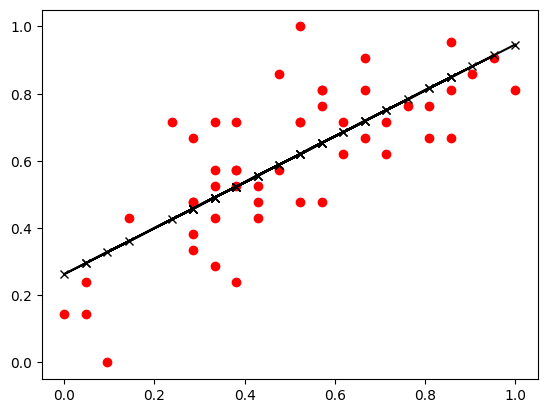

In [50]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, 'kx-', label='Fitting Line')

### Parâmetros treinados

In [51]:
print(model.w)

[[0.26297988 0.68330552]]


### Avaliação do modelo

In [52]:
loss = np.square(y_pred - y_train).mean()
loss

0.02117002289723966

### Valor ótimo, solução analítica

$$  \mathbf{w} =(\mathbf{x^T} \mathbf{x})^{−1}\mathbf{x^T} \mathbf{y} $$

In [53]:
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

[[0.26134159 0.68646976]]


# Exercícios

## Questões

1. Quantos parâmetros são treinados nesse modelo?

*   São 2 parametros  (w0 e w1)

2. Qual é o número de atributos de entrada para a rede?

*   São 2 atributos de entrada (bias + x)

3. Qual é o número de saídas da rede?

*   1 saida

4. Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada?
   Qual é o shape do matriz de saída?

*   Shape matriz de entrada: [5000, 2]      
*   Shape matriz de saida: [5000, 1]

## Atividades

1. Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final
   de cada época. Após o treinamento, plote o valor da perda em função da época.


In [ ]:
model = Net(2,1) # Instanciando a rede

In [36]:
# Modificando o laço do treinamento via gradiente descendente

lista_perdas = [] # Guardando em uma lista

num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    # loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()
    lista_perdas.append(loss)

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[1/100], loss: 0.021170
Epoch[2/100], loss: 0.021170
Epoch[3/100], loss: 0.021170
Epoch[4/100], loss: 0.021170
Epoch[5/100], loss: 0.021170
Epoch[6/100], loss: 0.021170
Epoch[7/100], loss: 0.021170
Epoch[8/100], loss: 0.021170
Epoch[9/100], loss: 0.021170
Epoch[10/100], loss: 0.021170
Epoch[11/100], loss: 0.021170
Epoch[12/100], loss: 0.021170
Epoch[13/100], loss: 0.021170
Epoch[14/100], loss: 0.021170
Epoch[15/100], loss: 0.021170
Epoch[16/100], loss: 0.021170
Epoch[17/100], loss: 0.021170
Epoch[18/100], loss: 0.021170
Epoch[19/100], loss: 0.021170
Epoch[20/100], loss: 0.021170
Epoch[21/100], loss: 0.021170
Epoch[22/100], loss: 0.021170
Epoch[23/100], loss: 0.021169
Epoch[24/100], loss: 0.021169
Epoch[25/100], loss: 0.021169
Epoch[26/100], loss: 0.021169
Epoch[27/100], loss: 0.021169
Epoch[28/100], loss: 0.021169
Epoch[29/100], loss: 0.021169
Epoch[30/100], loss: 0.021169
Epoch[31/100], loss: 0.021169
Epoch[32/100], loss: 0.021169
Epoch[33/100], loss: 0.021169
Epoch[34/100], loss

In [37]:
lista_perdas

[0.02117000379151052,
 0.02116995040474736,
 0.02116990193480691,
 0.021169857928858827,
 0.021169817975777626,
 0.021169781702301722,
 0.021169748769546245,
 0.021169718869836967,
 0.021169691723835923,
 0.021169667077931654,
 0.021169644701869838,
 0.021169624386602165,
 0.021169605942333282,
 0.02116958919674764,
 0.02116957399339963,
 0.02116956019025202,
 0.021169547658348917,
 0.02116953628061104,
 0.021169525950741893,
 0.021169516572234696,
 0.02116950805747077,
 0.021169500326900938,
 0.02116949330830237,
 0.021169486936103817,
 0.021169481150773037,
 0.021169475898260574,
 0.021169471129494858,
 0.02116946679992369,
 0.021169462869098064,
 0.02116945930029425,
 0.0211694560601707,
 0.021169453118456572,
 0.02116945044766891,
 0.021169448022855867,
 0.02116944582136366,
 0.021169443822624825,
 0.02116944200796617,
 0.021169440360434232,
 0.021169438864636958,
 0.021169437506599862,
 0.021169436273635482,
 0.02116943515422486,
 0.021169434137909896,
 0.021169433215195665,
 0.02

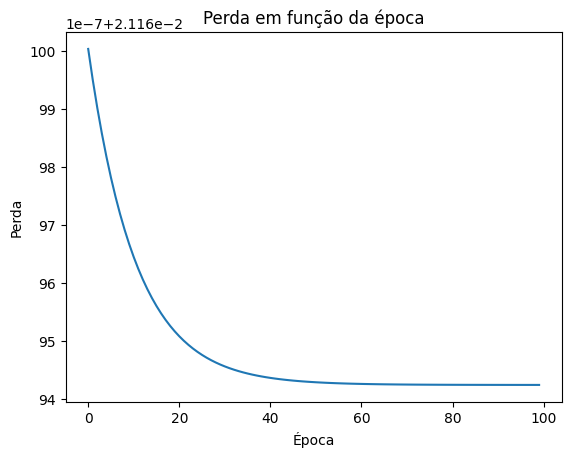

In [54]:
# Plotando a perda em função da época
plt.plot(lista_perdas)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda em função da época')
plt.show()

2. Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.


In [61]:
model = Net(2, 1)
pred = model.forward(x_train_bias)

# Cálculo da função de perda (sem treinar)
loss = np.square(pred - y_train).mean()
print("Perda inicial (MSE):", loss)


Perda inicial (MSE): 0.33364412293301593


3. Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e
   compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

In [56]:
# Solução otima

x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print("Solução ótima (w):", w_opt.T)

Solução ótima (w): [[0.26134159 0.68646976]]


In [67]:
model.w = w_opt.T # Atualizando manualmente os valores dos pesos

pred = model.forward(x_train_bias)

# Cálculo da função de perda (sem treinar)
loss = np.square(pred - y_train).mean()
print("Perda com solução ótima (MSE):", loss)

Perda com solução ótima (MSE): 0.021169424119097165


In [66]:
# Perda do treinamento via gradiente descendente
loss_gd = 0.021170
print("Perda com gradiente descendente (MSE):", loss_gd)

Perda com gradiente descendente (MSE): 0.02117


# Aprendizados

Ao comparar a perca manual com a obtida pelo método da otimização (gradiente descendente), encontramos:

*   loss (feito manualmente) = **0.021169**
*   loss (gradiente descendente) = **0.021170**

Logo, verificamos:

*   **Perda (feito manualmente):** Este valor representa a perda mínima teórica que podemos alcançar usando a solução analítica.

*   **Perda (gradiente descendente):** Este valor mostra a perda após o treinamento iterativo. Deve ser muito próximo ao valor da solução analítica se o treinamento for bem-sucedido.